# Data Science & Business Analytics - Task 1: Prediction using Supervised Machine Learning

## Prepared by: Karan Mirchandani

### Aim: To predict the score of a student when he/she studies for 9.25 hours.

## Importing all libraries

In [1]:
import pandas as pd  # for manipulating the dataset
import numpy as np   # for applying numerical operations on the observations
import matplotlib.pyplot as plt  # for plotting the graphs

from sklearn.model_selection import train_test_split     # for splitting the dataset into training and testing sets
from sklearn.linear_model import LinearRegression        # for building the linear regression model
from sklearn.metrics import mean_squared_error,mean_absolute_error  # for calculating mean squared error

## Reading the dataset

### Importing the raw dataset from GitHub:

In [2]:
dataURL='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

In [3]:
df=pd.read_csv(dataURL)

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Plotting the relationship between hours and score:

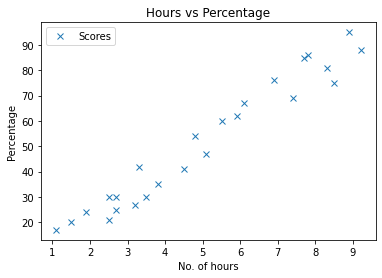

In [6]:
df.plot(x='Hours',y='Scores',style='x')
plt.title('Hours vs Percentage')
plt.xlabel('No. of hours')
plt.ylabel('Percentage')
plt.show()

### By plotting the relationship between the no. of hours studied and the score obtained, we see that there is linear relationship between these two variables. We'll now split the dataset into two parts, to create training and testing sets to build the model.

In [7]:
x=df.iloc[:,0:1]
y=df.iloc[:,1:]

## Splitting the dataset into training and test sets:

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

## Now we generate the Linear Regression Model by using the following commands:

In [9]:
lr=LinearRegression()

In [10]:
lr.fit(x_train,y_train)

LinearRegression()

In [11]:
lr.score(x_train,y_train)

0.9484509249326872

In [12]:
lr.score(x_test,y_test)

0.9367661043365055

In [13]:
pred=lr.predict(x_test)

## After the model is trained, we need to check how accurate the model is. For this we use the mean squared error metric (from Numpy):

In [14]:
print(mean_squared_error(pred,y_test))

20.33292367497997


In [15]:
print(np.sqrt(mean_squared_error(pred,y_test)))

4.5092043283688055


### As we can see, the value of MSE is 4.509. Lower the MSE, higher the accuracy of our model.

## Plotting the best fit line to ascertain the relationship betweeen the points in our scatter plot:

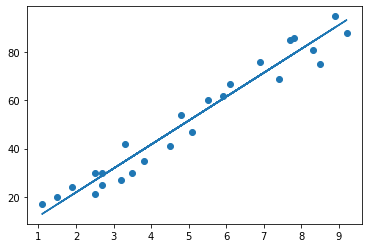

In [17]:
line = lr.coef_*x + lr.intercept_

plt.scatter(x,y)
plt.plot(x,line)
plt.show()

## Predicting the values

### Now we can use this model to predict upcoming values against the test set. It'll help us in ascertaining the accuracy of the model.

## Comparing actual values with predicted values:

In [19]:
df2=pd.DataFrame(y_test)
df2

,Scores
5,20
2,27
19,69
16,30
11,62
22,35
17,24


In [22]:
df2['Predicted values']=pred

In [28]:
df2

,Scores,Predicted values
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


### We know that the MSE is 4.509. The dataframe df2, shows this error, by comparing the predicted values against the actual values in the dataset.

## We have created our Linear Regression Model, with the help of which we'll able to predict the score of a child when the number of studying hours is set to 9.25. 

The Linear Regression Model predicts a numerical variable, when a condition (in the form of numerical variable) is given. So, we'll set the number of hours to 9.25 and predict the score. 

In [20]:
hours= [[9.25]]

In [21]:
prediction=lr.predict(hours)

In [22]:
prediction

array([[93.89272889]])

# The model is able to predict the score which is 93.89272. This means, if a student studies for 9.25 hours, his score will be 93.89272.